In [1]:
# Data Science Tools.
import numpy as np
import pandas as pd

# Obtención del data mediante la API de Yahoo Finance.
import yfinance as yf

# Visualización de datos.
import plotly.graph_objs as go

# Introducción

Vamos a utilizar el método **download** de la librería de **yahoo finance**. Este método nos entrega un DataFrame con **los valores de una acción específica**, en un periodo de tiempo determinado. Aquí se incluyen los valores máximo, mínimo, apertura y cierre en un periodo determinado.

Este método requiere tres argumentos: tickers, period, interval.

- <u>tickers</u>: Es un string que sirve para identificar de forma abreviada las acciones de una determinada empresa.

- <u>period</u>: Se entrega en forma de string, es el periodo de tiempo en el que se considerará el Data. 

- <u>interval</u>: Se entrega en forma de string.

#### Por ejemplo:

> yf.download(tickers='BTC-USD', period = '3mo', interval = '1h')

Representa un DataFrame, donde cada fila, representa los valores de Bitcoin en USD (de cierre,apertura,mínimo y máximo) para un intervalo determinado.

para el valor de BTC en USD, considerado en un periodo de 3 meses dividido en intervalos de 1 hora.

Para mayor información visitar la documentación oficial: https://pypi.org/project/yfinance/

# Vamos a estudiar el comportamiento de los valores de Bitcoin, Ether y ADA a tráves del tiempo.
Empecemos por definir nuestro periodo e intervalo.

In [2]:
# Estos valores se pueden cambiar
periodo='4y'
intervalo='1d'

Luego creamos los DataFrames para las tres criptomonedas mencionadas. Los valores de los tickers para cada respectiva moneda, pueden encontrarse en la página https://finance.yahoo.com. 

In [4]:
BTC= yf.download(tickers='BTC-USD', period = periodo, interval = intervalo)
ETH= yf.download(tickers='ETH-USD', period = periodo, interval = intervalo)
ADA = yf.download(tickers='ADA-USD', period = periodo, interval = intervalo)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [5]:
# Vamos a revisar el head de uno de nuestros DataFrame.
BTC.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-11-23,8232.379883,8267.400391,8038.770020,8038.770020,8038.770020,4225179904
2017-11-24,8074.020020,8374.160156,7940.930176,8253.690430,8253.690430,5058610176
2017-11-25,8241.709961,8790.919922,8191.149902,8790.919922,8790.919922,4342060032
2017-11-26,8789.040039,9522.929688,8775.589844,9330.549805,9330.549805,5475579904
2017-11-27,9352.719727,9818.349609,9352.719727,9818.349609,9818.349609,5653320192


#### Notemos que la columna 'Close' tiene los mismos valores que 'Adj Close'. Vamos a ver si es que esto ocurre con el resto de filas.

In [8]:
# Para hacerlo, revisamos para cada DataFrame, la cantidad de filas en donde estas columnas son distintas
print(len(BTC[BTC['Close'] != BTC['Adj Close']]))
print(len(ETH[ETH['Close'] != ETH['Adj Close']]))
print(len(ADA[ADA['Close'] != ADA['Adj Close']]))

0
0
0


#### Esto nos dice que ambas columnas son iguales para nuestros tres DataFrame, es por esto que vamos a eliminar la columna 'Adj Close' en cada una de ellas.

In [9]:
BTC.drop('Adj Close',axis=1,inplace=True)
ETH.drop('Adj Close',axis=1,inplace=True)
ADA.drop('Adj Close',axis=1,inplace=True)

#### Ahora vamos a concatenar nuestros Dataframes con el fin de organizar nuestra información. 

In [10]:
df= pd.concat([BTC,ETH,ADA],axis=1,keys=['BTC','ETH','ADA'])
df.columns.names = ['Criptomoneda','Valor']
df.head()

Criptomoneda          BTC                                                     \
Valor                Open         High          Low        Close      Volume   
Date                                                                           
2017-11-23    8232.379883  8267.400391  8038.770020  8038.770020  4225179904   
2017-11-24    8074.020020  8374.160156  7940.930176  8253.690430  5058610176   
2017-11-25    8241.709961  8790.919922  8191.149902  8790.919922  4342060032   
2017-11-26    8789.040039  9522.929688  8775.589844  9330.549805  5475579904   
2017-11-27    9352.719727  9818.349609  9352.719727  9818.349609  5653320192   

Criptomoneda         ETH                                                  \
Valor               Open        High         Low       Close      Volume   
Date                                                                       
2017-11-23    381.438995  425.548004  376.088013  410.165985  1845680000   
2017-11-24    412.501007  480.972992  402.757996  474.911011  2292829952   
2017-11-25    475.675995  485.191986  461.053009  466.276001  1422080000   
2017-11-26    465.973999  472.722992  451.605988  471.329987  1197779968   
2017-11-27    471.531006  493.404999  468.484985  480.355011  1396480000   

Criptomoneda       ADA                                          
Valor             Open      High       Low     Close    Volume  
Date                                                            
2017-11-23    0.028540  0.028678  0.027444  0.027444   5132300  
2017-11-24    0.027406  0.028597  0.026963  0.028382   5502350  
2017-11-25    0.028324  0.030447  0.027747  0.030447   6156460  
2017-11-26    0.030437  0.039855  0.030118  0.036332  30527100  
2017-11-27    0.036619  0.057127  0.036619  0.050593  77777296

## EDA
Vamos a explorar nuestro data, notemos que al concatenar los DataFrames, obtenemos un índice de dos niveles ('Criptomoneda' y 'Valor'). 


In [11]:
# Ejemplo de cómo utilizar el índice doble: La columna 'Open' asociada a 'BTC' es llamada mediante:
df['BTC']['Open']

Date
2017-11-23     8232.379883
2017-11-24     8074.020020
2017-11-25     8241.709961
2017-11-26     8789.040039
2017-11-27     9352.719727
                  ...     
2021-11-19    56896.128906
2021-11-20    58115.082031
2021-11-21    59730.507812
2021-11-22    58706.847656
2021-11-23    56309.652344
Name: Open, Length: 1458, dtype: float64

El método .xs() nos permite explorar DataFrames con multi-índices. Para mayor referencia https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.xs.html

Revisemos cuál es el mayor valor de cierre para cada criptomoneda durante el tiempo considerado.

In [12]:
df.xs(key='Close',axis=1,level='Valor').max()

Criptomoneda
BTC    67566.828125
ETH     4812.087402
ADA        2.968239
dtype: float64

Ahora obtendremos la fecha respectiva en cada caso. Para ello creamos una función llamada "maxmininfo" con la información respectiva. También incluiremos la información para los valores mínimos.

In [13]:
def maxmininfo(df,ticker):
    dff=pd.DataFrame(index=[ticker])
    dff['Fecha Min']=[df[ticker]['Close'].idxmin()]
    dff['Valor Min']=[df[ticker]['Close'].min()]
    dff['Fecha Max']=[df[ticker]['Close'].idxmax()]
    dff['Valor Max']=[df[ticker]['Close'].max()]
    return dff

In [14]:
# Al evaluar nuestra función en BTC, se obtiene lo siguiente:
maxmininfo(df,'BTC')

,Fecha Min,Valor Min,Fecha Max,Valor Max
BTC,2018-12-15,3236.761719,2021-11-08,67566.828125


In [15]:
# Ahora concatenamos la información de cada criptomoneda para verlo en un pequeño DataFrame.
pd.concat([maxmininfo(df,'BTC'),maxmininfo(df,'ETH'),maxmininfo(df,'ADA')])

,Fecha Min,Valor Min,Fecha Max,Valor Max
BTC,2018-12-15,3236.761719,2021-11-08,67566.828125
ETH,2018-12-14,84.308296,2021-11-08,4812.087402
ADA,2020-03-12,0.023961,2021-09-03,2.968239


## Primera Observación:

Notemos que las fechas para los **valores mínimos y máximos en Bitcoin y Ether son prácticamente iguales**. En base a esto, es natural preguntarse si existe alguna relación entre los cambios de valores de las criptomonedas. Esto será lo próximo que haremos.

Esto lo haremos de distintas maneras, empecemos con una comparación a nivel de gráficos.

### Comparación mediante los gráficos

Para graficar los valores de nuestros DataFrames, empezamos por importar algunas librerías.

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline


# Optional Plotly Method Imports
import plotly
import cufflinks as cf
cf.go_offline()

Ya que Bitcoin es muy grande en comparación con las mismas criptomonedas, no vale la pena graficar las en un mismo plot. Así que haremos cada gráfico por separado para hacernos una idea de cómo varían.

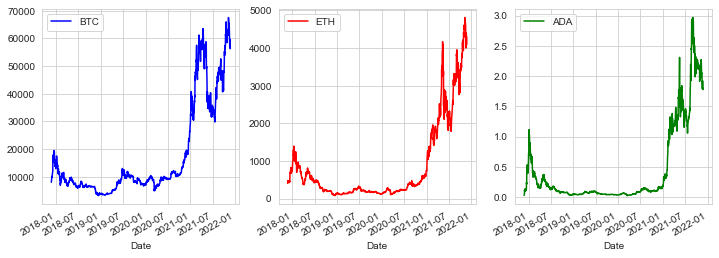

In [17]:
plt.subplot(1,3,1)
df['BTC']['Close'].plot(figsize=(12,4),label='BTC',color='blue')
plt.legend()


plt.subplot(1,3,2)
df['ETH']['Close'].plot(figsize=(12,4),label='ETH',color='red')
plt.legend()

plt.subplot(1,3,3)

df['ADA']['Close'].plot(figsize=(12,4),label='ADA',color='green')
plt.legend()

Podemos ver que la forma de los gráficos es bastante similar, esto nos da un indicio de una correlación. Así que ahora, veremos la correlación de cada una de estas.

### Correlación entre las variables

Vamos a ver la correlación existente entre cada una.

In [18]:
print("La correlación entre BTC y ETH es: "+str(df['BTC']['Close'].corr(df['ETH']['Close'])))
print("La correlación entre BTC y ADA es: "+str(df['BTC']['Close'].corr(df['ADA']['Close'])))
print("La correlación entre ADA y ETH es: "+str(df['ADA']['Close'].corr(df['ETH']['Close'])))

La correlación entre BTC y ETH es: 0.9191102688725825
La correlación entre BTC y ADA es: 0.8803488484753563
La correlación entre ADA y ETH es: 0.9621883333256922


## Observación:

Recordemos que nuestros datos, segmentan los valores de cada criptomoneda, por intervalos de un día. ¿Qué pasaría si consideramos periodos de 2 días o 1 semana? Es posible que esto varíe la correlación existente? Esta pregunta nace de la afirmación que dice que las criptomonedas siguen la tendencia del valor de Bitcoin, pero siempre con un pequeño retraso de algunos días. 

Es por esto, que vamos a considerar la misma pregunta pero segmentando la información en distintos intervalos de tiempo. Para hacerlo, definimos una función que nos facilite este cálculo:

In [ ]:
"""
Esta función, calcula una lista de correlaciones asociadas a dos criptomonedas en cierta cantidad de días.
Por ejemplo:

    corrwhithindays('BTC','ETH',3)
    
Calcula las correlaciones para los valores de Close de BTC y ETH segmentados en intervalos de 1 día y 2días.

def corrwhithindays(crypto1,crypto2,maxdays):
    l=[]
    for t in [ str(x)+'D' for x in range(1,maxdays) ]:
        x=df[crypto1]['Close'].resample(t).mean()
        y=df[crypto2]['Close'].resample(t).mean()
        l.append(x.corr(y))
    return l

In [20]:
def corrwhithindays(crypto1,crypto2,maxdays):
    l=[]
    for t in [ str(x)+'D' for x in range(1,maxdays) ]:
        x=df[crypto1]['Close'].resample(t).mean()
        y=df[crypto2]['Close'].resample(t).mean()
        l.append(x.corr(y))
    return l

Para organizar nuestra información, definimos un DataFrame que nos permita visualizar dichas correlaciones para los distintos intervalos de tiempo considerados.

In [23]:
dfcorrdays=pd.DataFrame()

#Vamos a considerar segmentar la información hasta un máximo de 10 días.
maxdays=11
dfcorrdays['Número de Días']=list(range(1,maxdays))
dfcorrdays['BTC-ETH']=corrwhithindays('BTC','ETH',maxdays)
dfcorrdays['BTC-ADA']=corrwhithindays('BTC','ADA',maxdays)
dfcorrdays['ADA-ETH']=corrwhithindays('ADA','ETH',maxdays)

dfcorrdays.set_index('Número de Días',inplace=True)

dfcorrdays

,BTC-ETH,BTC-ADA,ADA-ETH
Número de Días,,,
1,0.919110,0.880349,0.962188
2,0.919389,0.880896,0.962771
3,0.919883,0.881782,0.962310
4,0.920168,0.882115,0.962947
5,0.920536,0.882924,0.963007
6,0.920673,0.882886,0.963743
7,0.920511,0.882424,0.963927
8,0.920780,0.883881,0.964451
9,0.921714,0.884551,0.963410


Notemos que en cada caso hubo un aumento en la correlación pero muy pequeño. Asi que seguiremos segmentando la información en intervalos de 1 día.

## DataFrame returns
Recordemos que si se tiene un dataframe con una columna, en el cual su fila i-ésima es denotada por \\( f_i \\). Entonces returns se define como una columna, donde su i-ésima es denotada por \\( r_i \\). Y está definida mediante la siguiente regla:
\\[ r_{i} = \frac{f_i-f_{i-1}}{f_{i-1}} \\] 

Returns representa la variación porcentual con respecto a la fila anterior. Calcularemos Returns para el Close de cada criptomoneda.

In [24]:
# Empezamos por definir returns como un DataFrame vacío al cual vamos a rellenar.
returns = pd.DataFrame()

In [25]:
tickers=['BTC','ETH','ADA']

In [26]:
for tick in tickers:
    returns[tick+' Return'] = df[tick]['Close'].pct_change()
returns.head()

,BTC Return,ETH Return,ADA Return
Date,,,
2017-11-23,NaN,NaN,NaN
2017-11-24,0.026735,0.157851,0.034179
2017-11-25,0.065090,-0.018182,0.072757
2017-11-26,0.061385,0.010839,0.193287
2017-11-27,0.052280,0.019148,0.392519


Haremos el plot de las columnas Return para BTC y ETH para comparar sus variaciones porcentuales.

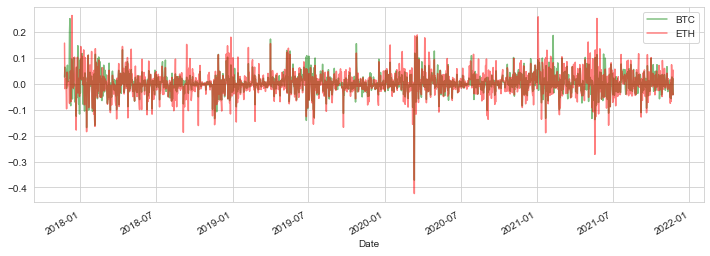

In [28]:
returns['BTC Return'].plot(figsize=(12,4),label='BTC',color='green',alpha=0.5)
returns['ETH Return'].plot(figsize=(12,4),label='ETH',color='red',alpha=0.5)
plt.legend()

Como es de esperar (ya que vimos sus comportamientos a nivel de gráfico y también sus correlaciones) vemos que sus columnas Return, nos generan gráficos similares para ambos casos.

Veamos en qué día cada criptomoneda tuvo su peor y mejor día según su returns.

In [38]:
returns.idxmin()

BTC Return   2020-03-12
ETH Return   2020-03-12
ADA Return   2020-03-12
dtype: datetime64[ns]

In [39]:
returns.idxmax()

BTC Return   2017-12-07
ETH Return   2017-12-12
ADA Return   2017-11-28
dtype: datetime64[ns]

Notemos que las tres criptomonedas tuvieron su peor día variacional el día 12 de Marzo del 2020 y el mejor día para cada una es bastante cercano (con una diferencia menor que 2 semanas para cada uno de ellos).

Revisemos la desviación estándar del dataframe returns, para tener una idea de la volatilidad de estas.

In [41]:
returns.std()

BTC Return    0.041399
ETH Return    0.052311
ADA Return    0.080434
dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='BTC Return', ylabel='Density'>

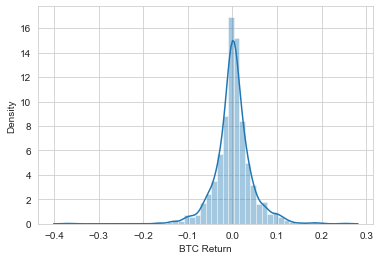

In [34]:
sns.distplot(returns['BTC Return'],bins=50)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='ETH Return', ylabel='Density'>

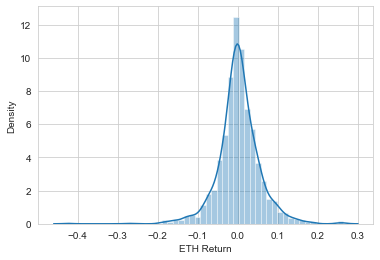

In [35]:
sns.distplot(returns['ETH Return'],bins=50)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='ADA Return', ylabel='Density'>

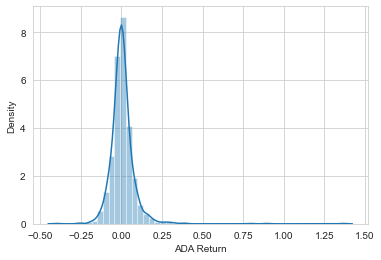

In [36]:
sns.distplot(returns['ADA Return'],bins=50)

### Promedio Móvil

El promedio móvil de una columna, es el promedio de los últimos N días de dicha columna (donde N es un parámetro que nosotros entregamos). Para obtenerlo utilizamos el método .rolling(window=N) y luego lo componemos con el método .mean().

In [ ]:
plt.figure(figsize=(12,6))
BTC['Close'].rolling(window=30).mean().plot(label='PM-30')
BTC['Close'].plot(label='BTC')
plt.legend()

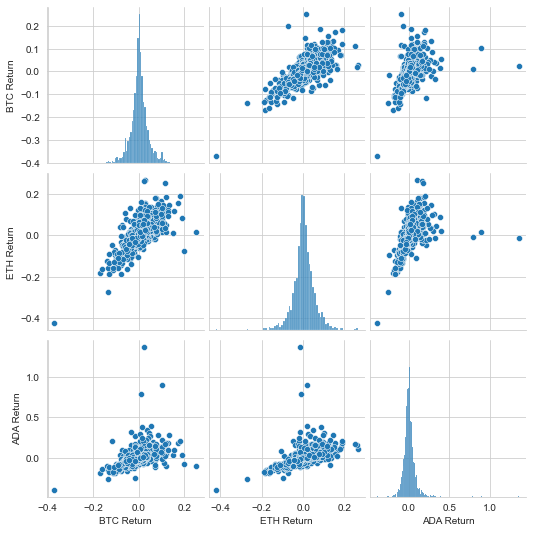

In [40]:
import seaborn as sns
sns.pairplot(returns[1:])